###### IMPORTAMOS LIBRERÍAS

In [46]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [47]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

###### CARGÁMOS IMÁGENES

In [48]:
dirname = os.path.join(os.getcwd(), 'D:\Prueba Software\Lluvias_prueba final')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  D:\Prueba Software\Lluvias_prueba final\
D:\Prueba Software\Lluvias_prueba final\No llueve 1
D:\Prueba Software\Lluvias_prueba final\Si llueve 640
Directorios leidos: 2
Imagenes en cada directorio [641, 639]
Suma Total de imagenes en subdirectorios: 1280


In [49]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad de etiquetas creadas: ",len(labels))

Cantidad de etiquetas creadas:  1280


In [50]:
lluvias=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    lluvias.append(name[len(name)-1])
    indice=indice+1

0 No llueve
1 Si llueve


In [51]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


###### DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA

In [52]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1024, 400, 400, 3) (1024,)
Testing data shape :  (256, 400, 400, 3) (256,)


Text(0.5, 1.0, 'Ground Truth : 0')

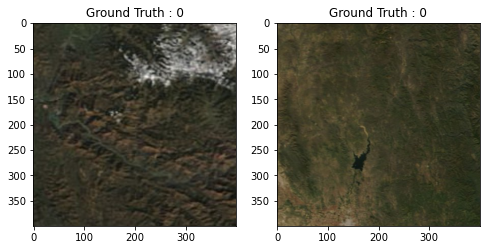

In [53]:
plt.figure(figsize=[8,8])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

###### PREPROCESAMIENTO DE DATOS

In [54]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [55]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0.]


In [56]:
#Mezclar todo y crear los grupos
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=42)

In [57]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(716, 400, 400, 3) (308, 400, 400, 3) (716, 2) (308, 2)


###### CREACIÓN DEL MODELO

In [40]:
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
#epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
#batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [117]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(400,400,3)))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(132, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 200, 200, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 100, 100, 128)    

In [91]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

###### ENTRENAMIENTO DEL MODELO DE CNN

In [92]:
batch_size = 64
epochs = 10

history = model.fit(train_X, train_label, 
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data = (valid_X,valid_label))

Epoch 1/10
12/12 [==============================] - 185s 15s/step - loss: 22.2097 - accuracy: 0.5298 - val_loss: 0.6920 - val_accuracy: 0.5195
Epoch 2/10
12/12 [==============================] - 181s 15s/step - loss: 0.5670 - accuracy: 0.7510 - val_loss: 0.5090 - val_accuracy: 0.9805
Epoch 3/10
12/12 [==============================] - 181s 15s/step - loss: 0.1844 - accuracy: 0.9408 - val_loss: 0.0591 - val_accuracy: 0.9968
Epoch 4/10
12/12 [==============================] - 203s 17s/step - loss: 0.1568 - accuracy: 0.9470 - val_loss: 0.0443 - val_accuracy: 0.9935
Epoch 5/10
12/12 [==============================] - 168s 14s/step - loss: 0.0889 - accuracy: 0.9945 - val_loss: 0.0765 - val_accuracy: 0.9870
Epoch 6/10
12/12 [==============================] - 155s 13s/step - loss: 0.0391 - accuracy: 0.9961 - val_loss: 0.0950 - val_accuracy: 0.9870
Epoch 7/10
12/12 [==============================] - 150s 13s/step - loss: 0.0362 - accuracy: 0.9925 - val_loss: 0.0675 - val_accuracy: 0.9903
Epoch

In [79]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entren
model.save("sports_mnist.h5py")

INFO:tensorflow:Assets written to: sports_mnist.h5py\assets


###### EVALUACIÓN DEL MODELO

In [93]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

8/8 [==============================] - 39s 3s/step - loss: 0.0508 - accuracy: 0.9961


In [94]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.050802554935216904
Test accuracy: 0.99609375


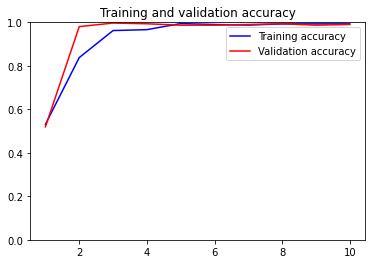

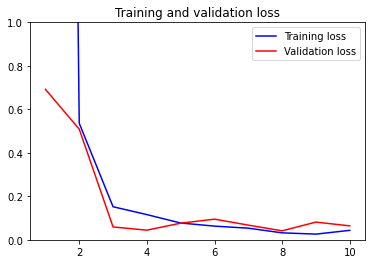

In [95]:
#accuracy = sport_train.history['accuracy']
#val_accuracy = sport_train.history['val_accuracy']
#loss = sport_train.history['loss']
#val_loss = sport_train.history['val_loss']
#epochs = range(len(accuracy))
#plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
#plt.title('Training and validation accuracy')
#plt.legend()
#plt.figure()
#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()
#plt.show()
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)

plt.figure()
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim(0.0,1.0)
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0.0,1.0)
plt.legend()



In [96]:
predicted_classes2 = model.predict(test_X)

In [106]:
predicted_classes=[]
for predicted_rain in predicted_classes2:
    predicted_classes.append(predicted_rain.tolist().index(max(predicted_rain)))
predicted_classes=np.array(predicted_classes)

In [107]:
predicted_classes.shape, test_Y.shape

((256,), (256,))

###### CORREGIMOS ERRORES

Found 255 correct labels


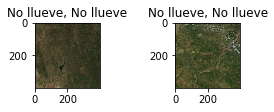

In [99]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:2]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(400,400,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lluvias[predicted_classes[correct]],
                                                    lluvias[test_Y[correct]]))

    plt.tight_layout()

Found 1 incorrect labels


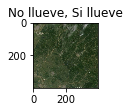

In [100]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:2]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(400,400,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lluvias[predicted_classes[incorrect]],
                                                    lluvias[test_Y[incorrect]]))
    plt.tight_layout()

In [101]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       138
     Class 1       1.00      0.99      1.00       118

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



###### PREDICCIÓN

D:\Prueba Software\Pred\predd10.jpg No llueve


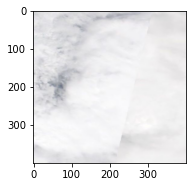

In [151]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['D:\Prueba Software\Pred\predd10.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (400, 400),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
plt.subplot(121)
plt.imshow(test_X[0,:,:], cmap='gray')
predicted_classes = model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], lluvias[img_tagged.tolist().index(max(img_tagged))])